In [3]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [ ]:
# Load the Financial news dataset
news_data = pd.read_csv("../data/Raw_analyst_ratings.csv")

# View structure of the data
print(news_data.info())
print(news_data.head())

news_data = news_data.dropna(subset=['headline', 'stock'])

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64
Articles per Day:
publication_date
2020-05-22    26
2020-05-26    28
2020-06-03    56
2020-06-05    62
Name: count, dtype: int64


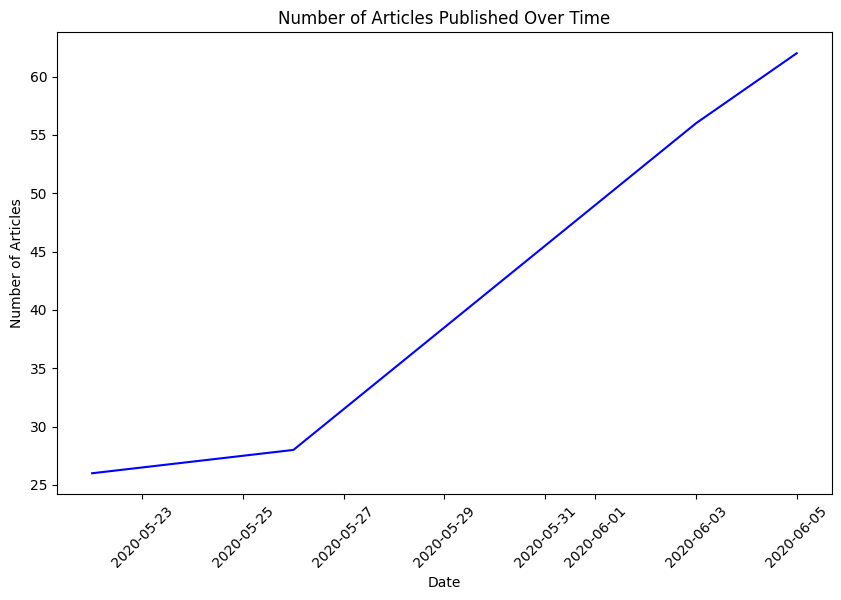

In [21]:
# Headline length
news_data['headline_length'] = news_data['headline'].apply(len)
print(news_data['headline_length'].describe())

# Articles per publisher
publisher_counts = news_data['publisher'].value_counts()
print("Articles per Publisher:")
print(publisher_counts)

# Assuming 'news_data' is already loaded with the necessary data

# Ensure the 'date' column is of datetime type
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')

# Check if the 'date' column has timezone information and remove it
if news_data['date'].dt.tz is not None:
    # Remove timezone information if it exists
    news_data['date'] = news_data['date'].dt.tz_localize(None)

# Extract the publication date without time for easier analysis
news_data['publication_date'] = news_data['date'].dt.date

# Count the number of articles published each day
articles_per_day = news_data['publication_date'].value_counts().sort_index()

print("Articles per Day:")
print(articles_per_day)

# Plot publication frequency over time
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='line', color='b')
plt.title("Number of Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

sentiment_category
Neutral     934914
Positive    341178
Negative    131236
Name: count, dtype: int64


C:\Users\bksam\AppData\Local\Temp\ipykernel_18052\540320502.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


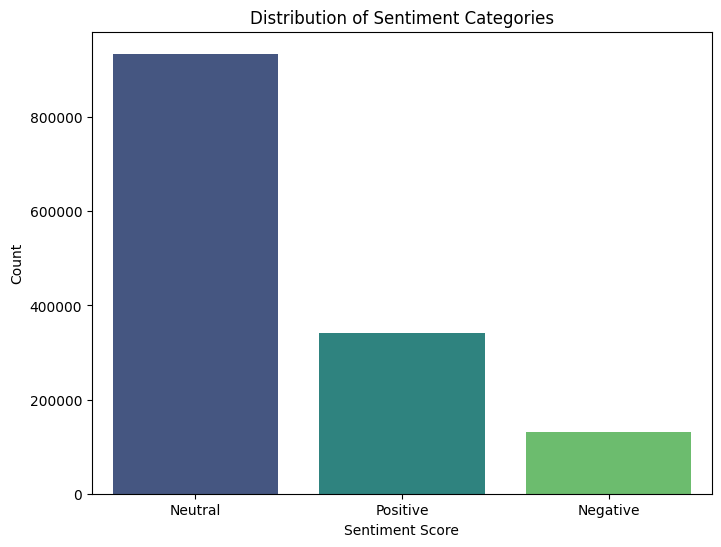

In [ ]:
# Perform sentiment analysis
def categorize_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

news_data['sentiment_category'] = news_data['headline'].apply(categorize_sentiment)

# Display sentiment category counts
sentiment_counts = news_data['sentiment_category'].value_counts()
print(sentiment_counts)

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribution of Sentiment Categories")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.show()

In [25]:
# Remove stopwords from the headlines
stop_words = stopwords.words('english')

# Vectorize the headlines
vectorizer = CountVectorizer(stop_words=stop_words, max_df=0.95, min_df=2)
X = vectorizer.fit_transform(news_data['headline'])

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top words for each topic
words = vectorizer.get_feature_names_out()
num_top_words = 10
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([words[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
    print()

NameError: name 'stopwords' is not defined